<a href="https://colab.research.google.com/github/fighaz/PCVK_2024/blob/main/Week9PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

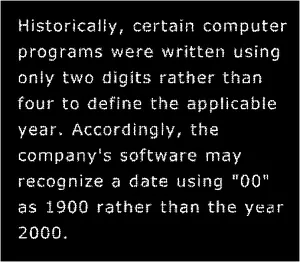

In [3]:
img = cv.imread('/content/drive/MyDrive/PCVK/morphology.png',0)

cv2_imshow(img)

In [4]:
print(img.shape)
print(img)

(262, 300)
[[213 149 153 ... 153 149 214]
 [143   2   1 ...   0   0 141]
 [147   1   8 ...   6   0 146]
 ...
 [148   0   5 ...   6   1 149]
 [139   0   0 ...   2   0 143]
 [210 147 150 ... 150 146 213]]


In [5]:
mask = np.array([[0,1,0],[1,1,1],[0,1,0]],dtype=np.uint8)
print(mask)
print(img.shape)

[[0 1 0]
 [1 1 1]
 [0 1 0]]
(262, 300)


# 3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png

In [6]:
# https://medium.com/@anshul16/dilation-morphological-operation-image-processing-82d16a619f59
def dilasi(img,mask,padding):
  img_padded = np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
  img_dilasi = np.zeros((img.shape),np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img_dilasi[i,j] = np.max(img_padded[i:i+mask.shape[0],j:j+mask.shape[1]]+mask)
      # region = img_padded[i:i + mask.shape[0], j:j + mask.shape[1]]
      # if np.any(region & mask):
      #           img_dilasi[i, j] = 255
  return img_dilasi

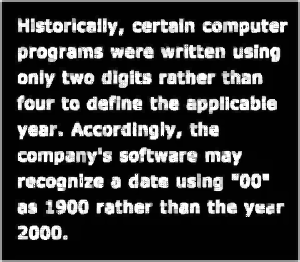

[[214 214 154 ... 154 215 215]
 [214 213 154 ... 154 214 215]
 [148 148   9 ...   7 147 147]
 ...
 [149 149   6 ...   7 150 150]
 [211 210 151 ... 151 213 214]
 [211 211 151 ... 151 214 214]]


In [7]:
# _, binary_image = cv.threshold(img, 128, 255, cv.THRESH_BINARY)
res = dilasi(img,mask,1)
cv2_imshow(res)
print(res)

# 4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

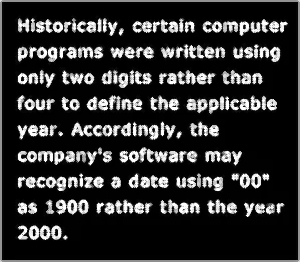

[[213 213 153 ... 153 214 214]
 [213 149 153 ... 153 149 214]
 [147 147   8 ...   6 146 146]
 ...
 [148 148   5 ...   6 149 149]
 [210 147 150 ... 150 146 213]
 [210 210 150 ... 150 213 213]]


In [8]:
dilation = cv.dilate(img,mask,iterations = 1)
cv2_imshow(dilation)
print(dilation)

# 5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

In [9]:
img_j = cv.imread('/content/drive/MyDrive/PCVK/j.png',0)
print(img_j)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
# https://medium.com/@anshul16/erosion-morphological-operation-image-processing-18537f7c66cd
def erosi(img,mask,padding):
  img_padded = np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
  img_erosi = np.zeros((img.shape),np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img_erosi[i,j] = np.min(img_padded[i:i+mask.shape[0],j:j+mask.shape[1]])

  return img_erosi

Citra Awal 	 Citra Hasil 


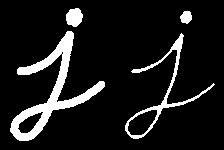

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
kernel = np.ones((5,5),np.uint8)
res = erosi(img_j,kernel,2)
print("Citra Awal \t Citra Hasil ")
combined_image= np.hstack((img_j,res))
cv2_imshow(combined_image)
print(res)

In [12]:
print(img_j)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

Citra Awal 	 Citra Hasil 


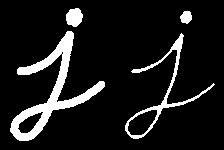

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
erosion = cv.erode(img_j,kernel,iterations = 1)
print("Citra Awal \t Citra Hasil ")
combined_image = np.hstack((img_j, erosion))
cv2_imshow(combined_image)
print(erosion)

# 7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

In [14]:
img_fp = cv.imread('/content/drive/MyDrive/PCVK/fingerprint.png',0)
print(img_fp)

[[  0   3  19 ...  21  16   0]
 [  0  27 224 ... 208 239  13]
 [  0   0   2 ...   0   5   3]
 ...
 [255 251 254 ...   2   0   3]
 [255 255 233 ...   0   1   3]
 [247  13  12 ...   0   2   5]]


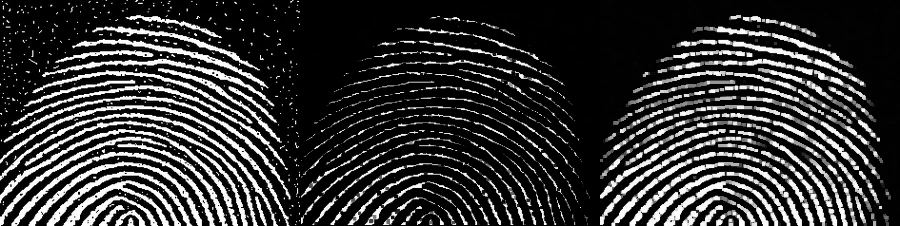

In [15]:
# https://medium.com/@anshul16/opening-morphological-operation-image-processing-bbdbe210e3bc
kernel = np.ones((3,3),np.uint8)
img_opening = erosi(img_fp,kernel,1)
res_opening = dilasi(img_opening,kernel,1)
res = np.hstack((img_fp,img_opening,res_opening))
cv2_imshow(res)

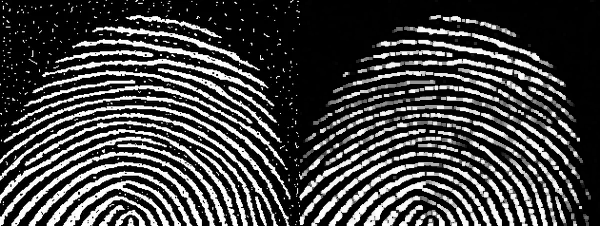

In [16]:
opening = cv.morphologyEx(img_fp, cv.MORPH_OPEN, kernel)
res = np.hstack((img_fp,opening))
cv2_imshow(res)

# 8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

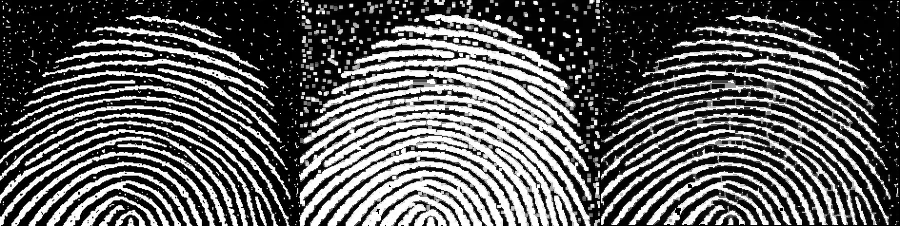

In [17]:
kernel = np.ones((3,3),np.uint8)
img_closing = dilasi(img_fp,kernel,1)
res_closing = erosi(img_closing,kernel,1)
res = np.hstack((img_fp,img_closing,res_closing))
cv2_imshow(res)

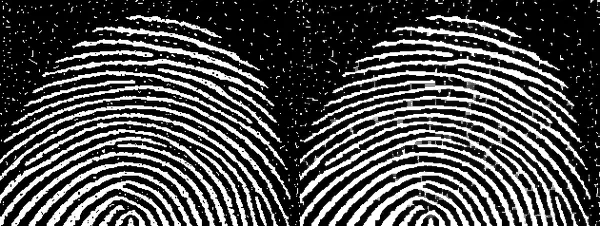

In [18]:
closing = cv.morphologyEx(img_fp, cv.MORPH_CLOSE, kernel)
res = np.hstack((img_fp,closing))
cv2_imshow(res)

# 9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

SED = Cross 3
Citra Awal 	 Citra Hasil 


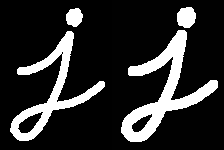

In [19]:
cross3 = np.array([[0,1,0],[1,1,1],[0,1,0]],dtype=np.uint8)
res = dilasi(img_j,cross3,1)
combined_image= np.hstack((img_j,res))
print("SED = Cross 3")
print("Citra Awal \t Citra Hasil ")
cv2_imshow(combined_image)

SED = Cross 5
Citra Awal 	 Citra Hasil 


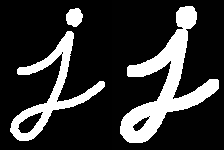

In [20]:
cross5 = np.array([
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]],dtype=np.uint8)
res = dilasi(img_j,cross5,2)
combined_image= np.hstack((img_j,res))
print("SED = Cross 5")
print("Citra Awal \t Citra Hasil ")
cv2_imshow(combined_image)


# 10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)#

SED = Circle 3
Citra Awal 	 Citra Hasil 


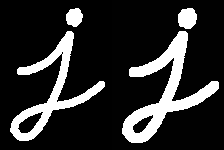

In [21]:
circ_3 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
res = dilasi(img_j,circ_3,2)
combined_image= np.hstack((img_j,res))
print("SED = Circle 3")
print("Citra Awal \t Citra Hasil ")
cv2_imshow(combined_image)

SED = Circle 5
Citra Awal 	 Citra Hasil 


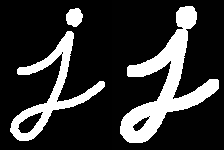

In [22]:
circ_5 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
res = dilasi(img_j,circ_5,2)
combined_image= np.hstack((img_j,res))
print("SED = Circle 5")
print("Citra Awal \t Citra Hasil ")
cv2_imshow(combined_image)

# 11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

SED = Rectangle 3x5 
Citra Awal 	 Citra Hasil 


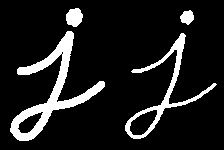

In [25]:
rect_35 = cv.getStructuringElement(cv.MORPH_RECT,(3,5))
res = erosi(img_j,rect_35,2)
combined_image= np.hstack((img_j,res))
print("SED = Rectangle 3x5 ")
print("Citra Awal \t Citra Hasil ")
cv2_imshow(combined_image)

SED = Rectangle 5x7 
Citra Awal 	 Citra Hasil 


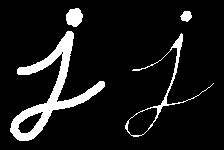

In [27]:
rect_57 = cv.getStructuringElement(cv.MORPH_RECT,(5,7))
res = erosi(img_j,rect_57,2)
combined_image= np.hstack((img_j,res))
print("SED = Rectangle 5x7 ")
print("Citra Awal \t Citra Hasil ")
cv2_imshow(combined_image)

# 12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

SED = Vertical 3 
Citra Awal 	 Citra Hasil 


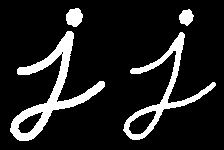

In [29]:
vert3 = np.array([[0,1,0],[0,1,0],[0,1,0]],dtype=np.uint8)
res = erosi(img_j,vert3,1)
combined_image= np.hstack((img_j,res))
print("SED = Vertical 3 ")
print("Citra Awal \t Citra Hasil ")
cv2_imshow(combined_image)

SED = Vertical 5 
Citra Awal 	 Citra Hasil 


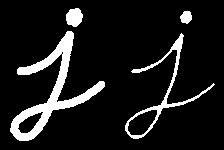

In [36]:
vert5 = np.array([[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0]],dtype=np.uint8)
res = erosi(img_j,vert5,2)
combined_image= np.hstack((img_j,res))
print("SED = Vertical 5 ")
print("Citra Awal \t Citra Hasil ")
cv2_imshow(combined_image)